# Análise Espectral
## Transformada de Fourier

A análise espectral baseia-se na ideia de usar “somas trigonométricas” de senos e cossenos para descrever fenômenos periódicos. Se a série é periódica, a expansão do sinal é chamada de Série de Fourier. Se é aperiódica, a expansão é denominada Transformada de Fourier (ou Integral de Fourier) [1].

A Transformada de Fourier fornece a decomposição do sinal em ondas de frequências distintas, produzindo o espectro. Por ele é possível visualizar o sinal em bandas de frequências, facilitando a análise. Constatam-se, assim, quais frequências e ruídos compõem o sinal [2].

O software Octave possui função interna para converter o domínio do tempo de um sinal para o domínio da frequência, tratando-se da Transformada rápida de Fourier (FFT), que pode ser acionada por fft() [3]. Opcionalmente, fftshift() move a frequência central da FFT para o centro do vetor, facilitando a visualização e análise do espectro [4].

O espectrograma corresponde ao gráfico de duas dimensões que relaciona o tempo e a frequência do sinal. Quando a ele se acrescenta a terceira dimensão, como a correspondente à amplitude do sinal (medida em dB), relacionando-a a cores, é possível constatar a energia do sinal ao longo do tempo e respectivas frequências, o que pode ser útil, por exemplo, para esteganografia ou análises de EEG, erupções vulcânicas, terremotos etc. a partir de seus sinais característicos [5] [6].

---

REFERÊNCIAS

[1]	Aguirre, Antonio. Uma introdução à análise espectral de séries temporais econômicas. In: Nova Economia, vol. 5, n. 1. Belo Horizonte. 1995. Disponível em: https://revistas.face.ufmg.br/index.php/novaeconomia/article/download/2284/1224/7444.  Acesso em 26 mar. 2023.

[2]	Nunes, Tássia. Análise Espectral e transformada de Fourier em processamento de sinal de EEG. In: Brain Suport [portal]. Disponível em: https://www.brainlatam.com/blog/analise-espectral-e-transformada-de-fourier-em-processamento-de-sinal-de-eeg-4248. Acesso em: 26 mar. 2023.

[3]	GNU Octave (version 8.1.0). Sinal Processing. Disponível em: https://docs.octave.org/v8.1.0/Signal-Processing.html. Acesso em: 26 mar. 2023.

[4]	Octave Forge. Disponível em: https://octave.sourceforge.io/octave/function/fftshift.html. Acesso em: 26 mar. 2023.

[5]	PNSN. What is a Spectrogram? Disponível em: https://pnsn.org/spectrograms/what-is-a-spectrogram. Acesso em: 26 mar. 2023.

[6]	WikiSEC. Imagem em áudio. Disponível em: https://wiki.imesec.ime.usp.br/books/ctf-starter-pack/page/imagem-em-%C3%A1udio. Acesso em: 26 mar. 2023.

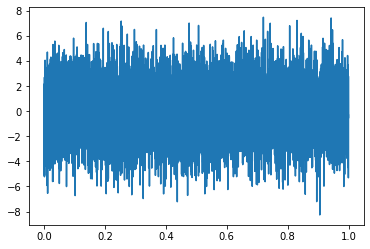

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 8000 # Frequência de amostragem em Hz
L = 8000 # Número de amostras
t = np.arange(0, L/Fs, 1/Fs) # Vetor de tempo

x = 0.7*np.sin(2*np.pi*500*t) + np.sin(2*np.pi*2000*t) + 2*np.random.randn(L) # Sinal de áudio

plt.plot(t, x) # Plot do sinal

In [2]:
print(t)
print(type(t))
print(len(t))

[0.00000e+00 1.25000e-04 2.50000e-04 ... 9.99625e-01 9.99750e-01
 9.99875e-01]
<class 'numpy.ndarray'>
8000


In [3]:
X = np.fft.fft(x) # Transformada de Fourier

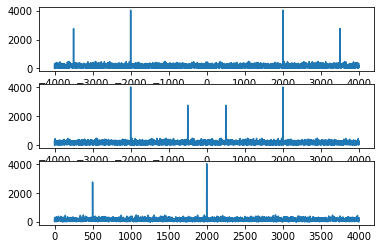

In [4]:
import numpy as np
import matplotlib.pyplot as plt

freq = np.arange(-(L/2-1), L/2)*Fs/L # Vetor de frequência
pfreq = np.arange(0, L/2+1)*Fs/L # Frequências positivas

if len(X) != len(freq):
    X = X[:-1] # Corta o último elemento de x para que tenha o mesmo tamanho de y

plt.subplot(3,1,1)
plt.plot(freq, np.abs(X))
plt.subplot(3,1,2)
plt.plot(freq, np.abs(np.fft.fftshift(X)))
plt.subplot(3,1,3)
plt.plot(pfreq, np.abs(X[:L//2+1]))


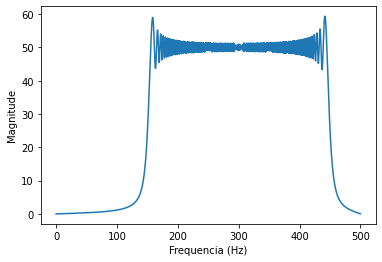

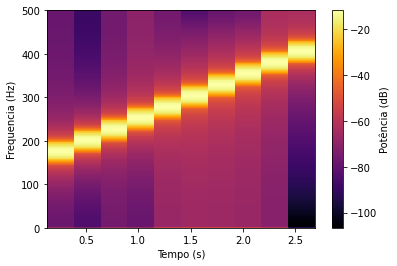

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parâmetros do sinal
fs = 1000  # Frequência de amostragem
t = np.arange(0, 3, 1/fs)  # Vetor de tempo
f0 = 150  # Frequência inicial
t1 = 3  # Duração da variação de frequência
f1 = 450  # Frequência final
B = (f1-f0)/t1  # Largura de banda

# Geração do sinal
y = np.cos(2*np.pi*(f0*t+B/2*t**2))

# Cálculo do espectro do sinal
Y = np.abs(np.fft.fft(y))
F = np.linspace(0, fs/2, round(len(y)/2))
plt.plot(F, Y[:round(len(y)/2)])
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitude')

# Cálculo do espectrograma do sinal
f, t_spec, Sxx = signal.spectrogram(y, fs=fs, window='hamming', nperseg=512, noverlap=256, scaling='spectrum')
plt.figure()
plt.pcolormesh(t_spec, f, 10*np.log10(Sxx), cmap='inferno')
plt.ylim([0, 500])
plt.xlabel('Tempo (s)')
plt.ylabel('Frequencia (Hz)')
plt.colorbar(label='Potência (dB)')
plt.show()


In [6]:
len(y)

3000

In [7]:
from IPython.display import Audio

# reproduzir o sinal
fs = 44100
Audio(y, rate=fs)


In [8]:
lena = '/content/drive/MyDrive/Datasets/lena.wav'
from IPython.display import Audio

from IPython.display import Audio
Audio(lena)

In [ ]:
!pip install librosa
import librosa

y, sr = librosa.load(lena, sr=None)

In [10]:
import numpy as np

n_fft = 2048
hop_length = 512
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

<ipython-input-11-89a36e3a393a>:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


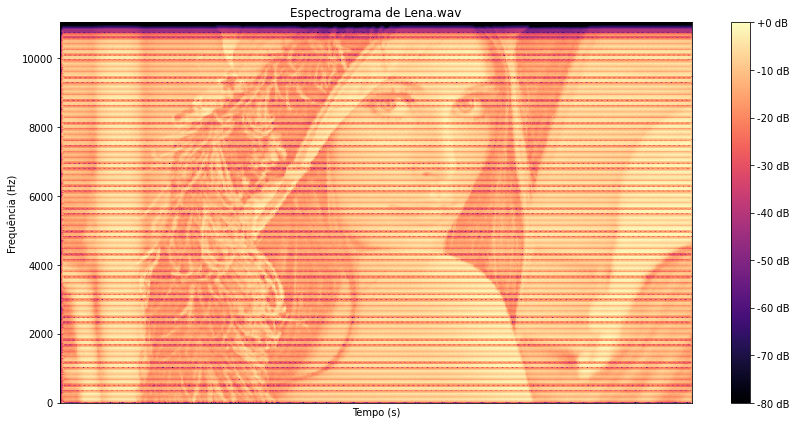

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Carrega o arquivo de áudio
y, sr = librosa.load(lena)

# Calcula o espectrograma
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Plota a imagem
plt.figure(figsize=(12, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de Lena.wav')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.tight_layout()
plt.show()

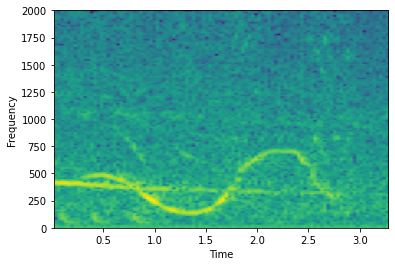

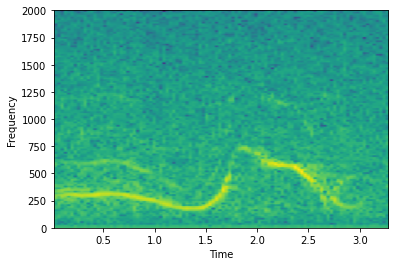

In [12]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Carregando os dados do arquivo whalecalls.mat
data = sio.loadmat('/content/drive/MyDrive/Datasets/whalecalls.mat')
X1 = data['X1']
X2 = data['X2']
fs = int(data['fs'][0][0])

# Gerando o espectrograma para X1
plt.specgram(X1[0], Fs=fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Gerando o espectrograma para X2
plt.specgram(X2[0], Fs=fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [13]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Sep 13 15:13:57 2007',
 '__version__': '1.0',
 '__globals__': [],
 'fs': array([[4000]], dtype=uint16),
 'X1': array([[-0.12512207, -0.08862305, -0.01721191, ...,  0.        ,
          0.0020752 ,  0.0177002 ],
        [-0.00354004, -0.00024414, -0.00146484, ...,  0.00109863,
         -0.00231934, -0.00146484],
        [ 0.00842285, -0.0012207 ,  0.00793457, ..., -0.02294922,
         -0.01330566,  0.01647949],
        ...,
        [ 0.00769043, -0.00183105,  0.00244141, ...,  0.00146484,
          0.00036621, -0.00048828],
        [-0.00109863, -0.00793457, -0.00158691, ...,  0.09753418,
         -0.05407715, -0.03918457],
        [-0.00183105, -0.02844238,  0.01757812, ...,  0.00537109,
         -0.01123047, -0.00512695]]),
 'X2': array([[-0.04553223, -0.03430176, -0.06079102, ...,  0.0144043 ,
          0.01330566, -0.01416016],
        [ 0.02624512,  0.00402832, -0.01416016, ...,  0.01794434,
         -0.033691

In [14]:
fs

4000